In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from scipy.sparse.linalg import svds

In [7]:
with open("Film/Film_tropes_dataset3.json", 'r') as f:
    movie_dataset = json.load(f)
    
with open("Literature/Literature_tropes_dataset3.json", 'r') as f:
    book_dataset = json.load(f)

In [10]:
dataset = dict()

for movie, tropes in movie_dataset.items():
    dataset["movie-" + movie] = tropes
    
for book, tropes in book_dataset.items():
    dataset["book-"+book] = tropes
    

In [15]:
len(dataset)

7767

In [149]:
vectorizer = TfidfVectorizer(max_df = .7,
                            min_df = 0.005)
my_matrix = vectorizer.fit_transform([" ".join(tropes) for tropes in dataset.values()]).transpose()

/Users/macuser/Dropbox/Coursework/SP19/CS4300/assignment0/venv/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [150]:
my_matrix.shape

(3373, 7767)

In [151]:
u, s, v_trans = svds(my_matrix, k=100)

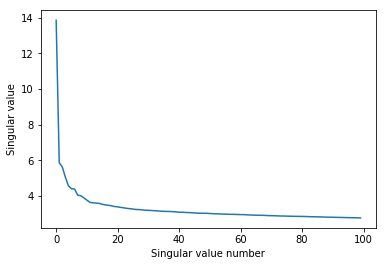

In [152]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [162]:
tropes_compressed, _, docs_compressed = svds(my_matrix, k=20)
docs_compressed = docs_compressed.transpose()

In [163]:
trope_to_index = vectorizer.vocabulary_
index_to_trope = {i:t for t,i in trope_to_index.items()}
print(tropes_compressed.shape)

(3373, 20)


In [164]:
#row normalize
from sklearn.preprocessing import normalize
tropes_compressed = normalize(tropes_compressed, axis = 1)

In [165]:
def closest_tropes(trope_in, k = 10):
    if trope_in not in trope_to_index: return "Not in trope vocab."
    sims = tropes_compressed.dot(tropes_compressed[trope_to_index[trope_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_trope[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [166]:
len(trope_to_index)

3373

In [167]:
closest_tropes("xanatosgambit")

[('unwittingpawn', 0.9027145238146468),
 ('xanatosspeedchess', 0.864494382387907),
 ('didntseethatcoming', 0.8304317449050465),
 ('spannerintheworks', 0.8269351436554458),
 ('outgambitted', 0.8026792941555941),
 ('gambitpileup', 0.800732854988877),
 ('thanatosgambit', 0.7914248765271048),
 ('theplan', 0.7821898977661184),
 ('selffulfillingprophecy', 0.7795313403453952),
 ('ifiwantedyoudead', 0.7772858893082364)]

In [168]:
index_to_doc = [k for k in dataset]
doc_to_index = {k: i for i, k in enumerate(dataset)}

In [169]:
docs_compressed = normalize(docs_compressed, axis = 1)

def closest_projects(doc_name, doc_type, k = 10):
    doc_index = doc_to_index[doc_name]
    sims = docs_compressed.dot(docs_compressed[doc_index,:])
    asort = np.argsort(-sims)
    res = [(index_to_doc[i], sims[i]/sims[asort[0]]) for i in asort if doc_type in index_to_doc[i]][:k+1]
#     asort = np.argsort(-sims)[:k+1]
    return res

In [173]:
closest_projects("book-Harry Potter and the Prisoner of Azkaban", "movie")

[('movie-Murder on the Orient Express', 0.7061014929454373),
 ("movie-Pirates of the Caribbean: Dead Man's Chest", 0.685237493447648),
 ('movie-Homeward Bound II: Lost in San Francisco', 0.6851928252445058),
 ('movie-Star Wars: Episode V - The Empire Strikes Back', 0.6839609257346494),
 ('movie-The Empire Strikes Back', 0.6839609257346494),
 ('movie-Toy Story', 0.683135886369114),
 ('movie-The Rugrats Movie', 0.6821134183626213),
 ('movie-Jersey Girl', 0.6680828882009483),
 ('movie-Dr. Dolittle', 0.6586612109151525),
 ('movie-Ice Age 2: The Meltdown', 0.6565547992886899),
 ('movie-Shrek 2', 0.6549784271347993)]